In [166]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import random
from sklearn.pipeline import Pipeline

cifar10 = tf.keras.datasets.cifar10

### Load the cifar10 Dataset
cifar10 is formatted as two tuples, one for training and one for testing

In [167]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [168]:
print("training data: ", train_images.shape, train_labels.shape, "\ntesting data: ", test_images.shape, test_labels.shape)

training data:  (50000, 32, 32, 3) (50000, 1) 
testing data:  (10000, 32, 32, 3) (10000, 1)


In [169]:
import pickle
images = open("../train.pkl", "rb")

car_images = pickle.load(images)
car_labels = np.empty([8144, 1])
for i in range(8144):
    car_labels[i][0] = 1

images.close()

In [170]:
print("car data: ", car_images.shape, car_labels.shape)

car data:  (8144, 32, 32, 3) (8144, 1)


In [171]:
train_images = np.concatenate((train_images, car_images))
train_labels = np.concatenate((train_labels, car_labels))

In [172]:
print("training data: ", train_images.shape, train_labels.shape)

training data:  (58144, 32, 32, 3) (58144, 1)


In [173]:
# Label and plot images
''' 
I changed this from the full list to just two:
This GREATLY improves model accuracy
'''
class_names = ['NOT vehicle', 'vehicle']

# Change data set to only have 2 labels
for i in range(50000):
    if train_labels[i][0] not in {1, 9}:
        train_labels[i][0] = 0
    else:
        train_labels[i][0] = 1
        
for i in range(10000):
    if test_labels[i][0] not in {1, 9}:
        test_labels[i][0] = 0
    else:
        test_labels[i][0] = 1

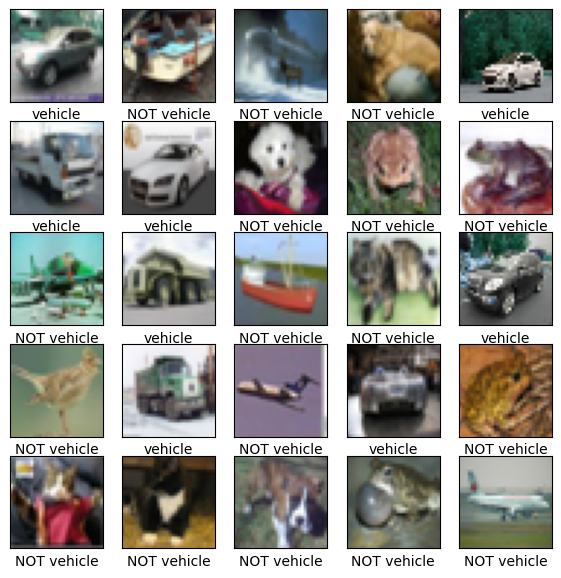

In [174]:
plt.figure(figsize=(7,7))
for i in range(25):
    random_image = random.randint(1,58144)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_image])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[int(train_labels[random_image][0])])
plt.show()

In [175]:
# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Preprocessing: Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Create a subset for development to avoid long training time
subset_size = 5000

# Randomly select indices for the subset
subset_indices = np.random.choice(np.arange(46500, 52500), subset_size, replace=False)

# Create the subset
sub_train_images = train_images[subset_indices]
sub_train_labels = train_labels[subset_indices]




In [176]:
#Define the model to be used for the SVC
Lin_Model = SVC(probability = False, kernel = 'linear', C = 0.1)
Pol_Model = SVC(probability=False, kernel = 'poly', C = 0.1, verbose=True)
Rbf_Model = SVC(probability=False, kernel = 'rbf', C = 0.1, gamma = 1)

In [177]:
Pol_Model.fit(sub_train_images, sub_train_labels)

[LibSVM]

SVC(C=0.1, kernel='poly', verbose=True)

In [178]:
# Predict the labels for test set
pred_label = Pol_Model.predict(test_images)

# Evaluate the model
accuracy = accuracy_score(test_labels, pred_label)
#report = classification_report(test_labels, pred_label)

print("Accuracy:", accuracy)
#print("Classification Report:")
#print(report)

Accuracy: 0.8335


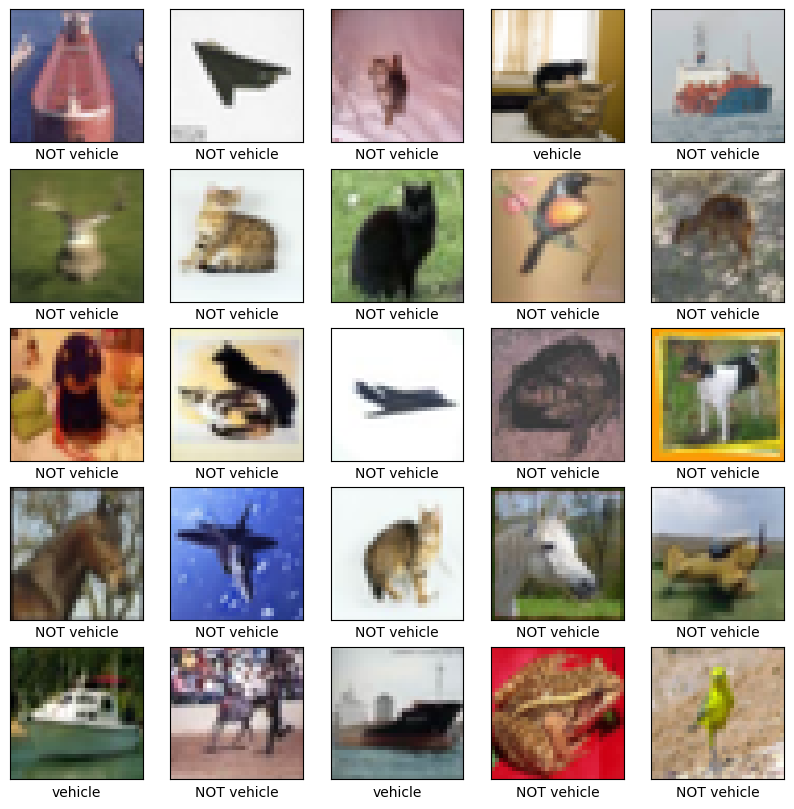

In [179]:
plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1,10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_image].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[int(pred_label[random_image])])  # Use predicted labels
plt.show()


In [180]:
import pickle
images = open("../output.pkl", "rb")

dev_images = pickle.load(images)

images.close()

# Normalize pixel values
dev_images = dev_images / 255.0

# Preprocessing: Flatten the images
dev_images = dev_images.reshape(dev_images.shape[0], -1)

In [181]:
dev_pred_label = Pol_Model.predict(dev_images)

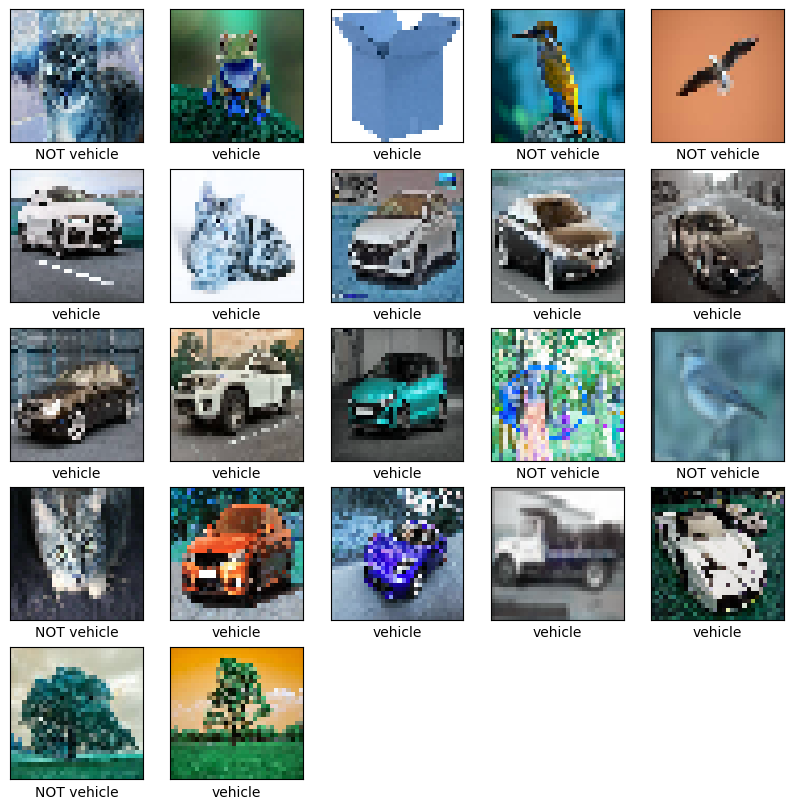

In [182]:
plt.figure(figsize=(10,10))
for i in range(22):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dev_images[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[int(dev_pred_label[i])])  # Use predicted labels
plt.show()
